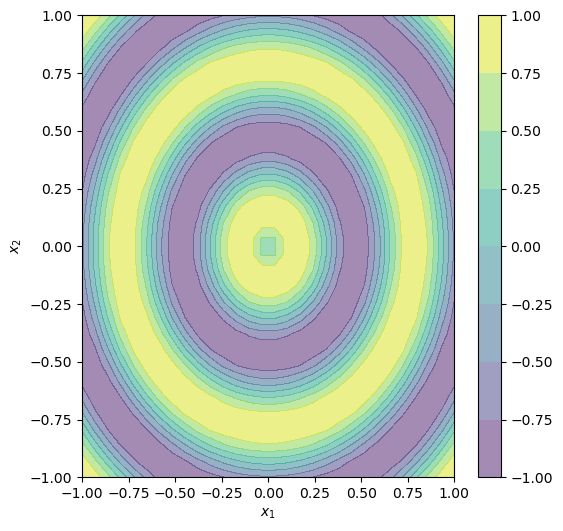

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# define the function to generate the y
def circles(X):
    y = np.sin(10*np.sqrt(X[:,0] ** 2 + X[:,1] ** 2))
    return y

# generate x by drawing from a random variable 
def generate_data(y_func,N=1000):
    # draw X randomly 
    X = 2*np.random.rand(N,2)-1
    # add noise to the function 
    y = y_func(X) + 0.25* np.random.randn(N)
    return X,y

# draw the contour 
def draw_contours(y_func):
    plt.figure(figsize=(6,6))
    X1,X2 = np.meshgrid(np.linspace(-1, 1, 30),np.linspace(-1, 1, 30))
    Y = y_func(np.c_[X1.ravel(),X2.ravel()]).reshape(X1.shape)
    plt.contourf(X1,X2,Y,alpha=0.5)
    c = plt.colorbar()
    plt.xlabel('$x_{1}$')
    plt.ylabel('$x_{2}$')
    return None

X,y = generate_data(circles)
f = draw_contours(circles)


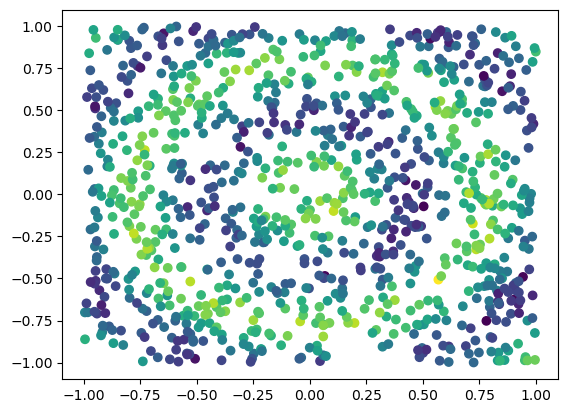

In [2]:
s = plt.scatter(X[:,0],X[:,1],c=y) 

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

/Users/dhammatornriewcharoon/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step
CPU times: user 4.22 s, sys: 639 ms, total: 4.86 s
Wall time: 4.03 s


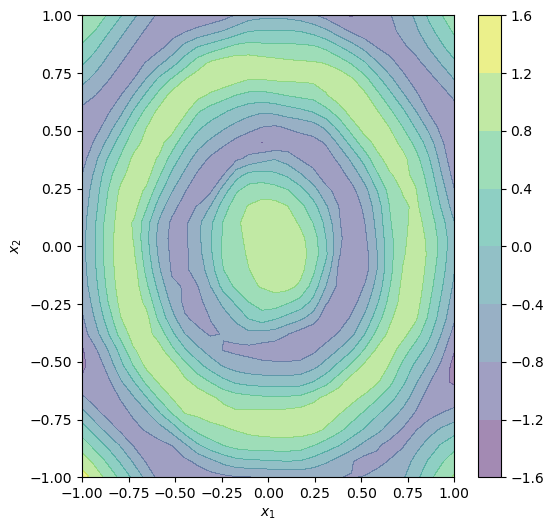

In [4]:

%%time
# Define model called Sequential 
# Model that goes sequentially from input -> hidden -> output 
model = Sequential()
# Add a dense layer (full connected layer)
model.add(Dense(50, input_dim=2, activation='relu'))
# Add another layer without input dim 
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
# Define output layer 
model.add(Dense(1, activation='linear'))
# Compile the model , optimised with MSE loss function, Adam optimiser gradient descent 
model.compile(loss='mse', optimizer='adam')
model.fit(X, y, epochs=256, batch_size=64,verbose=False)

f = draw_contours(model.predict)